In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
karate_o_results = pd.read_excel('karate_random_o_all_ari.xlsx', header=None)
dolphins_o_results = pd.read_excel('dolphins_random_o_all_ari.xlsx', header=None)
polbooks_o_results = pd.read_excel('polbooks_random_o_all_ari.xlsx', header=None)

karate_o_results = np.array(karate_o_results)
dolphins_o_results = np.array(dolphins_o_results)
polbooks_o_results = np.array(polbooks_o_results)

/var/folders/9k/p01wbwzj46gg6nbtcxrd3x_h0000gn/T/ipykernel_14762/3206549622.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels([f"{v:.2f}" for v in random_values], rotation=45)
/var/folders/9k/p01wbwzj46gg6nbtcxrd3x_h0000gn/T/ipykernel_14762/3206549622.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels([f"{v:.2f}" for v in random_values], rotation=45)
/var/folders/9k/p01wbwzj46gg6nbtcxrd3x_h0000gn/T/ipykernel_14762/3206549622.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels([f"{v:.2f}" for v in random_values], rotation=45)


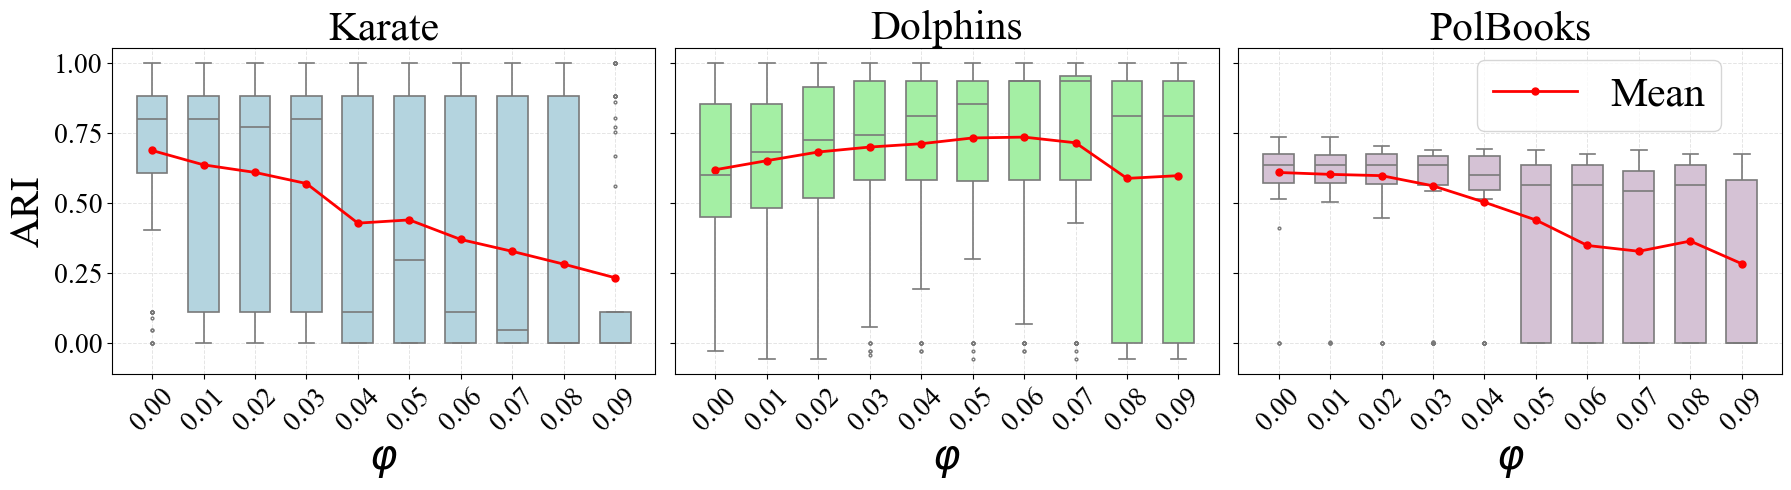

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 参数取值
random_values = np.arange(0.0, 0.10, 0.01)
plt.rcParams['font.family'] = 'Times New Roman'
# 创建画布
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
plt.subplots_adjust(wspace=0.15)

# 数据与颜色设置
datasets = [
    (karate_o_results, "Karate", "#ADD8E6"),  # 浅蓝
    (dolphins_o_results, "Dolphins", "#98FB98"),  # 浅绿
    (polbooks_o_results, "PolBooks", "#D8BFD8")   # 浅紫
]

for i, (data, title, box_color) in enumerate(datasets):
    # 构造长表数据
    df_long = pd.DataFrame({
        "random_value": np.repeat(random_values, data.shape[1]),
        "result": data.flatten()
    })

    # 绘制箱线图（统一浅色填充）
    sns.boxplot(
        x="random_value",
        y="result",
        data=df_long,
        ax=ax[i],
        width=0.6,
        fliersize=2,
        linewidth=1.2,
        color=box_color
    )

    # 计算并绘制均值折线
    means = data.mean(axis=1)
    ax[i].plot(range(len(random_values)), means, color='red', marker='o',
               markersize=5, linewidth=2, label='Mean')
    
    ax[i].tick_params(axis='both', which='major', labelsize=20)
    # 样式设置
    ax[i].set_title(title, fontsize=30)
    ax[i].set_xlabel(r"$\varphi$", fontsize=30)
    if i == 0:
        ax[i].set_ylabel("ARI", fontsize=30)
    else:
        ax[i].set_ylabel(None)

    ax[i].set_xticklabels([f"{v:.2f}" for v in random_values], rotation=45)

    ax[i].grid(True, which='major', axis='both', color='lightgray', linestyle='--', linewidth=0.7, alpha=0.6)

    if i==2:
        # ax[i].legend(loc='upper left', bbox_to_anchor=(0.365, 0.85), fontsize=15)
        ax[i].legend(loc='best', bbox_to_anchor=(0.40, 0.68), fontsize=30)

# 布局微调
plt.tight_layout()
plt.savefig("random_results.pdf", format='pdf', bbox_inches='tight', dpi=600)
plt.show()